<a href="https://colab.research.google.com/github/subbugalam47/CNN_mnist-and-CV2-work/blob/kaggle_competations/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN ON MNIST 

In [ ]:
# importing main libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


#Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [ ]:
# Loading the mnist dataset

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

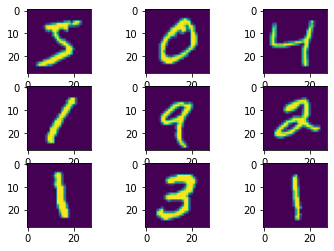

In [ ]:
for i in range(9):
  plt.subplot(330 +1+i)
  plt.imshow(x_train[i])

In [ ]:
print(X_train.shape[0])
#print(X_train[0])

60000


In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 2ms/step - loss: 0.3583 - accuracy: 0.8924
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0868 - accuracy: 0.9732
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0585 - accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0432 - accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0345 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0267 - accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0236 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0214 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0156 - accuracy: 0.9950
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.015

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0648 - accuracy: 0.9834


[0.064804807305336, 0.9833999872207642]

1


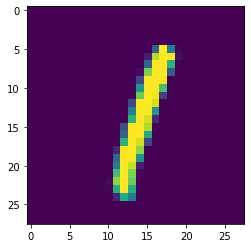

In [ ]:
plt.imshow(X_test[5])
prediction=model.predict(x_test.reshape(x_test.shape[0], 28, 28, 1))
print(np.argmax(prediction[5]))

## cv2 work 

True

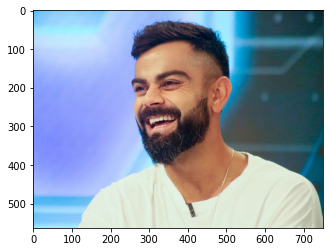

In [ ]:
# simple Reading and Writing images
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

#reading the image 

image = cv2.imread('/content/drive/MyDrive/Virat-Kohli.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#plotting the image
plt.imshow(image)

#saving image
cv2.imwrite('test_write.jpg',image)

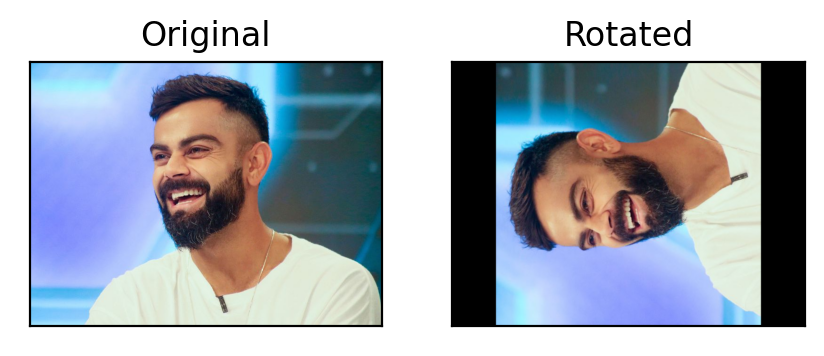

In [ ]:
# Rotatating image by 90 degrees
plt.figure(figsize=(5,2),dpi=200)
rows,cols = image.shape[:2] 
#(col/2,rows/2) is the center of rotation for the image 
# M is the cordinates of the center 
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Rotated')
plt.xticks([]), plt.yticks([])
plt.show()

(1970, 2625, 3)
(563, 750, 3)


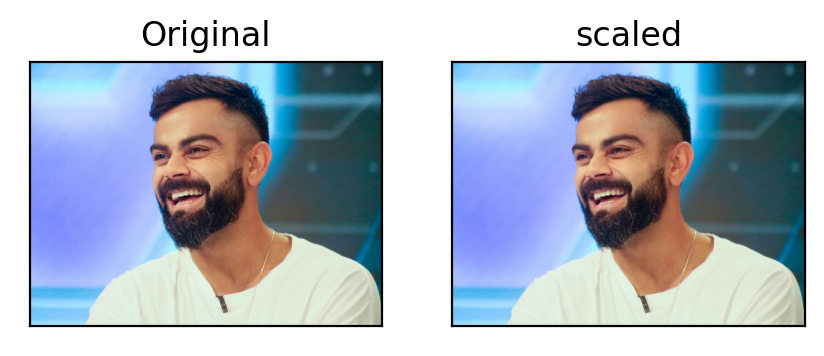

In [ ]:
# note: you can see image size changing in saved images only

plt.figure(figsize=(5,2),dpi=200)
height, width = image.shape[:2]
dimensions = int(width*2),int(height*2)
resize = cv2.resize(image,dimensions, interpolation = cv2.INTER_LINEAR)
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(res),plt.title('scaled')
plt.xticks([]), plt.yticks([])
print(resize.shape)
print(image.shape)
cv2.imwrite('resized_img.jpg',resize)
plt.show()


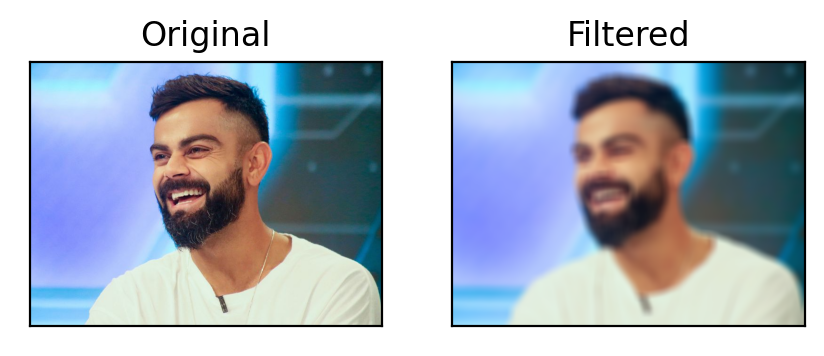

In [ ]:
# filtering images by using filters
plt.figure(figsize=(5,2),dpi=200)
blur = cv2.blur(image,(20,20))
median = cv2.medianBlur(image,5)
blur2 = cv2.bilateralFilter(image,9,75,75)
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Filtered')
plt.xticks([]), plt.yticks([])
plt.show()

## Text classifier using LSTM

In [2]:
# using kaggle api for downloading.....
import os
os.environ['KAGGLE_USERNAME'] = "subbugalam" # username from the json file
os.environ['KAGGLE_KEY'] = "13e8240df5e590ce4365bd6e13f842a1" # key from the json file\
!kaggle competitions download -c fake-news

  0% 0.00/40.6k [00:00<?, ?B/s]
100% 40.6k/40.6k [00:00<00:00, 15.5MB/s]
 53% 5.00M/9.42M [00:00<00:00, 23.0MB/s]
100% 9.42M/9.42M [00:00<00:00, 31.3MB/s]
 94% 35.0M/37.0M [00:01<00:00, 10.8MB/s]
100% 37.0M/37.0M [00:01<00:00, 29.4MB/s]


In [3]:
!unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [4]:
!unzip /content/test.csv.zip

Archive:  /content/test.csv.zip
  inflating: test.csv                


In [6]:
import pandas as pd
import numpy as np

In [7]:
train_df = pd.read_csv('/content/train.csv')

In [8]:
test_df = pd.read_csv('/content/test.csv')

In [9]:
main_df = pd.concat([train_df.drop(['label'],axis=1),test_df],axis=0)

In [10]:
main_df.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [11]:
main_df.title=main_df.title.fillna(main_df['text'])
main_df.text=main_df.text.fillna(main_df.title)
main_df.author = main_df.author.fillna('unknown')
main_df.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [14]:
X= main_df
y = train_df['label']

In [15]:
# importing libraries
from tensorflow.keras.layers import Embedding ,LSTM , Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential

In [16]:
voc_size= 5000
messages = X.copy()
messages.reset_index(inplace=True)

In [17]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
# setting up the corpus
ps = PorterStemmer()
corpus = []
for i in range(0,len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review =review.lower()
    review = review.split()
    review = [ps.stem(word)for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
21000
21001
21002
21003
21004
21005
21006
21007
21008
21009
21010
21011
21012
21013
21014
21015
21016
21017
21018
21019
21020
21021
21022
21023
21024
21025
21026
21027
21028
21029
21030
21031
21032
21033
21034
21035
21036
21037
21038
21039
21040
21041
21042
21043
21044
21045
21046
21047
21048
21049
21050
21051
21052
21053
21054
21055
21056
21057
21058
21059
21060
21061
21062
21063
21064
21065
21066
21067
21068
21069
21070
21071
21072
21073
21074
21075
21076
21077
21078
21079
21080
21081
21082
21083
21084
21085
21086
21087
21088
21089
21090
21091
21092
21093
21094
21095
21096
21097
21098
21099
21100
21101
21102
21103
21104
21105
21106
21107
21108
21109
21110
21111
21112
21113
21114
21115
21116
21117
21118
21119
21120
21121
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21132
21133
21134
21135
21136
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
21155
21156
21157
2

In [20]:
corpus


['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'life life luxuri elton john favorit shark pictur stare long transcontinent flight',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find hom

In [21]:
# one hot encoding for corpus
one_represent = [one_hot(words,voc_size) for words in corpus]
one_represent

[[3821, 1883, 2337, 2175, 2226, 4615, 3296, 3381, 1058, 3141],
 [4038, 690, 4489, 3286, 2835, 647, 2849],
 [3700, 1509, 1041, 3724],
 [1559, 4218, 1998, 2473, 1309, 1630],
 [4626, 2835, 4950, 4303, 329, 2921, 2835, 2992, 2066, 3035],
 [141,
  1743,
  3594,
  2470,
  2348,
  4786,
  3459,
  2561,
  1225,
  309,
  4165,
  4863,
  3260,
  1687,
  2849],
 [582, 582, 2081, 4455, 20, 4218, 1659, 4976, 3300, 1942, 3549, 1186],
 [2559, 1571, 4938, 2469, 1327, 3339, 2135, 2021, 310, 2617, 2012],
 [398, 1389, 980, 4318, 4786, 1581, 4989, 1284, 4234, 3537, 310, 2617, 2012],
 [2976, 2169, 570, 4893, 2754, 4691, 4786, 2670, 310, 2617, 2012],
 [4153, 4784, 4113, 4347, 673, 3174, 4987, 986, 4786, 1917],
 [2440, 1, 931, 1254, 1831, 4841, 1699, 330],
 [2258, 2879, 4487, 4139, 2017, 982, 225, 1683, 2525, 3605, 3869],
 [2473, 2042, 2226, 3174, 4786, 2754],
 [4622, 2675, 890, 3323, 2399, 4379, 2782, 4685, 3263],
 [3579, 415, 710, 4344, 1549, 1782, 2744, 310, 2617, 2012],
 [887, 197, 1765, 923, 1184, 310, 

In [23]:
# adding pad sequence to maintain same length
sent_length = 20
embedded_docs = pad_sequences(one_represent,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3381 1058 3141]
 [   0    0    0 ... 2835  647 2849]
 [   0    0    0 ... 1509 1041 3724]
 ...
 [   0    0    0 ...  310 2617 2012]
 [   0    0    0 ... 2258   27 2143]
 [   0    0    0 ...  310 2617 2012]]


In [24]:
# LSTM model setup.....
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
# splitting into train and test data
X_final=np.array(embedded_docs)
X_train_final  = X_final[:20800]

X_test_final   = X_final[20800:]
y_final = np.array(y)
X_test_final.shape

(5200, 20)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test =train_test_split(X_train_final ,y_final ,test_size=0.1,random_state=42)

In [29]:
# fitting the model with accuracy
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
293/293 [==============================] - 12s 32ms/step - loss: 0.4221 - accuracy: 0.7921 - val_loss: 0.2116 - val_accuracy: 0.9183
Epoch 2/10
293/293 [==============================] - 9s 30ms/step - loss: 0.1376 - accuracy: 0.9446 - val_loss: 0.2299 - val_accuracy: 0.9187
Epoch 3/10
293/293 [==============================] - 9s 32ms/step - loss: 0.0969 - accuracy: 0.9654 - val_loss: 0.2348 - val_accuracy: 0.9163
Epoch 4/10
293/293 [==============================] - 9s 30ms/step - loss: 0.0710 - accuracy: 0.9770 - val_loss: 0.2738 - val_accuracy: 0.9087
Epoch 5/10
293/293 [==============================] - 9s 30ms/step - loss: 0.0488 - accuracy: 0.9843 - val_loss: 0.3053 - val_accuracy: 0.9125
Epoch 6/10
293/293 [==============================] - 9s 30ms/step - loss: 0.0320 - accuracy: 0.9892 - val_loss: 0.2817 - val_accuracy: 0.9106
Epoch 7/10
293/293 [==============================] - 9s 30ms/step - loss: 0.0268 - accuracy: 0.9920 - val_loss: 0.4156 - val_accuracy: 0.912

In [30]:
# predicting test data
y_pred = model.predict_classes(X_test_final)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [31]:
y_pred=y_pred.reshape(5200)
type(y_pred)

numpy.ndarray

In [32]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int32)